# Univariate Time Series

<b>Definition</b> from <a href='https://onlinecourses.science.psu.edu/stat510/node/47'>here</a>: <i>a sequence of measurements of the same variable collected over time</i>. Examples: stock prices, demand, housing prices.

In pandas a univariate time series is a Series object where the index is a "timestamp".

## Stock prices

Our goal is to create a Series object <i>stock</i> with the Google stock closing price.

<b>Stock History info:</b> You can get the Google stock historical price data from https://finance.yahoo.com/quote/GOOGL/history?p=GOOGL
In 'Historical Data' tab, set the 'Time Period' to Max, then 'Apply', then 'Download Data'. A .csv file will be downloaded into your local computer. Rename the file to **GOOGL.csv**

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The following code creates a Series object <i>stock</i> based on GOOGL.csv file. Index is the date and the variable is the Google stock closing prices. 

In [5]:
# import the two packages that we sill use in this script
import pandas as pd
import numpy as np

In [7]:
# Use read_csv to read data
data = pd.read_csv('GOOGL.csv',index_col=0, parse_dates=True)
#or use the following two lines
#data = pd.read_csv('GOOGL.csv',index_col=0)
#data.index = data.index.astype('datetime64[ns]') #ns: nano second-based time format

In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...
2022-01-10,2701.560059,2776.389893,2663.290039,2773.389893,2773.389893,2220400
2022-01-11,2760.139893,2804.320068,2733.850098,2794.719971,2794.719971,1436500
2022-01-12,2823.000000,2852.159912,2813.889893,2828.610107,2828.610107,1305400


In [11]:
#Set to 2 decimal places, and display all columns
# Use set_option function

# % denotes the variable
# %f indicates that it is a float
# .2 states that you want two digits
# The outer % denotes the variable you want to replace the inner % with

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [13]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.05,52.08,48.03,50.22,50.22,44659096
2004-08-20,50.56,54.59,50.30,54.21,54.21,22834343
2004-08-23,55.43,56.80,54.58,54.75,54.75,18256126
2004-08-24,55.68,55.86,51.84,52.49,52.49,15247337
2004-08-25,52.53,54.05,51.99,53.05,53.05,9188602


### Create an univariate time series based on stock closing price

In [16]:
# Get stock closing price from 'Close' column and save it to stock variable
stock = data['Close']

In [18]:
stock

Date
2004-08-19     50.22
2004-08-20     54.21
2004-08-23     54.75
2004-08-24     52.49
2004-08-25     53.05
               ...  
2022-01-10   2773.39
2022-01-11   2794.72
2022-01-12   2828.61
2022-01-13   2771.74
2022-01-14   2789.61
Name: Close, Length: 4384, dtype: float64

In [20]:
# Use describe function to get the statistical description of stock
stock.describe()

count   4384.00
mean     671.72
std      614.44
min       50.06
25%      246.90
50%      423.58
75%      977.08
max     2996.77
Name: Close, dtype: float64

In [22]:
# Get index object of stock
stock.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14'],
              dtype='datetime64[ns]', name='Date', length=4384, freq=None)

In [24]:
# Get value array of stock
stock.array

<NumpyExtensionArray>
[  50.220219,   54.209209,   54.754753,   52.487488,   53.053055,    54.00901,
   53.128128,   51.056057,   51.236237,   50.175175,
 ...
 2899.830078,  2887.98999,      2755.5, 2754.949951, 2740.340088, 2773.389893,
 2794.719971, 2828.610107,  2771.73999, 2789.610107]
Length: 4384, dtype: float64

The following command will plot the stock price

<Axes: xlabel='Date'>

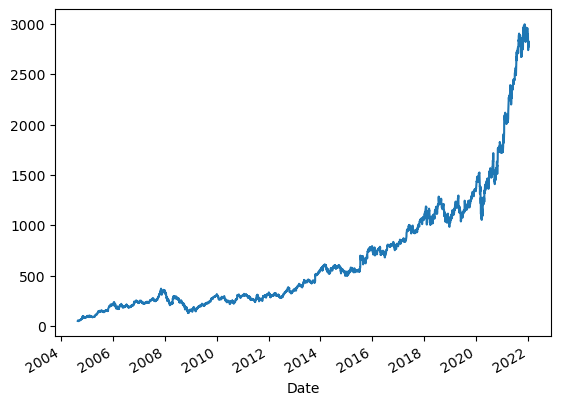

In [27]:
# Polt the line chart
stock.plot()

## Exploring a Time Series

This Series object has one entry for each trading day. The index (of type <i>datetime64</i>) is the day and the value (of type <i>float64</i>) is the closing price.

Let's take a look at the first 10 days of data

In [32]:
# Get first 10 elemesnts in stock
stock.head(10)

Date
2004-08-19   50.22
2004-08-20   54.21
2004-08-23   54.75
2004-08-24   52.49
2004-08-25   53.05
2004-08-26   54.01
2004-08-27   53.13
2004-08-30   51.06
2004-08-31   51.24
2004-09-01   50.18
Name: Close, dtype: float64

Let's take a look at the last 10 days of data

In [35]:
# Get last 10 elemesnts in stock
stock.tail(10)

Date
2022-01-03   2899.83
2022-01-04   2887.99
2022-01-05   2755.50
2022-01-06   2754.95
2022-01-07   2740.34
2022-01-10   2773.39
2022-01-11   2794.72
2022-01-12   2828.61
2022-01-13   2771.74
2022-01-14   2789.61
Name: Close, dtype: float64

In [37]:
#Use .index[] to to get top 10 elemesnts in stock
stock.index[:10]

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [39]:
# Check the length of stock
len(stock)

4384

## Questions

Answer these questions without using for loops.

<b>Question 1</b><br/>What day had the largest stock price and what's the price? 

In [44]:
# Use nlargest function to get 1 largest values from stock
stock.nlargest(1)


Date
2021-11-18   2996.77
Name: Close, dtype: float64

<b>Question 2</b><br/>What are the 10 days with largest stock price? Report both the day and the price.

In [47]:
# Use nlargest function to get 10 largest values from stock
stock.nlargest(10)

Date
2021-11-18   2996.77
2021-11-08   2980.62
2021-11-19   2978.53
2021-11-09   2978.37
2021-11-05   2977.04
2021-11-12   2973.56
2021-11-15   2969.04
2021-11-04   2965.35
2021-12-08   2963.73
2021-11-17   2960.94
Name: Close, dtype: float64

<b>Question 3</b><br/>How much profit (ratio) would we have made if we had bought at the beginning and sold everything on the last day? Do not type in any date.

In [50]:
stock.values[0]

50.220219

In [52]:
# get the first value counting from "right" - get the first value counting from "left" 
# / the first value counting from "left"
(stock.values[-1] - stock.values[0] ) / stock.values[0]

54.547549623389735

Or ...

In [55]:
(stock.iloc[-1] - stock.iloc[0]) / stock.iloc[0]

54.547549623389735

<b>Question 4</b><br/>
What is the moving average of the price at each trading session? Use a 50-trading-days window. <i>Hint</i>: Explore the method <i>rolling</i>

In [58]:
# Pandas dataframe.rolling() function provides the feature of rolling window calculations. 
# The concept of rolling window calculation is most primarily used in signal processing and time-series data. 
# In very simple words we take a window size of k at a time and perform some desired mathematical operation on it. 
rol = stock.rolling(50)

In [60]:
rol

Rolling [window=50,center=False,axis=0,method=single]

In [62]:
# check rol type
type(rol)

pandas.core.window.rolling.Rolling

In [64]:
# Get the mean of 0 to 49th in stock
stock[0:50].mean()

63.58698696

In [66]:
# get mean from all windows in rol
rol.mean()

Date
2004-08-19       NaN
2004-08-20       NaN
2004-08-23       NaN
2004-08-24       NaN
2004-08-25       NaN
               ...  
2022-01-10   2905.54
2022-01-11   2902.22
2022-01-12   2901.39
2022-01-13   2898.66
2022-01-14   2895.81
Name: Close, Length: 4384, dtype: float64

Set the numbers of rows to show in a truncated view to 100 rows

In [69]:
# All rows will display if total rows <= display.max_rows 
# Once the display.max_rows is exceeded, the display.min_rows options determines how many rows are shown
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)

If want to set unlimited number of rows(all rows), then use the following  

In [72]:
#pd.set_option('display.max_rows', None)

In [74]:
# get mean from all windows in rol
# 50th value is the same as stock[:50].mean()
rol.mean()

Date
2004-08-19       NaN
2004-08-20       NaN
2004-08-23       NaN
2004-08-24       NaN
2004-08-25       NaN
2004-08-26       NaN
2004-08-27       NaN
2004-08-30       NaN
2004-08-31       NaN
2004-09-01       NaN
2004-09-02       NaN
2004-09-03       NaN
2004-09-07       NaN
2004-09-08       NaN
2004-09-09       NaN
2004-09-10       NaN
2004-09-13       NaN
2004-09-14       NaN
2004-09-15       NaN
2004-09-16       NaN
2004-09-17       NaN
2004-09-20       NaN
2004-09-21       NaN
2004-09-22       NaN
2004-09-23       NaN
2004-09-24       NaN
2004-09-27       NaN
2004-09-28       NaN
2004-09-29       NaN
2004-09-30       NaN
2004-10-01       NaN
2004-10-04       NaN
2004-10-05       NaN
2004-10-06       NaN
2004-10-07       NaN
2004-10-08       NaN
2004-10-11       NaN
2004-10-12       NaN
2004-10-13       NaN
2004-10-14       NaN
2004-10-15       NaN
2004-10-18       NaN
2004-10-19       NaN
2004-10-20       NaN
2004-10-21       NaN
2004-10-22       NaN
2004-10-25       NaN
2004-10-

<b>Question 5</b><br/>
Consider this investment strategy: buy on day x and then sell after 5 days (on day x+5). Find the expected profit (in %) of this operation. <i>Hint</i>: explore the method <i>shift</i>

In [ ]:
stock.head()

In [87]:
# .shift() function Shift index by desired number of periods.
# Shift the index axis (rows) by 1 period in a negative direction
stock.shift(-1).head()

Date
2004-08-19   54.21
2004-08-20   54.75
2004-08-23   52.49
2004-08-24   53.05
2004-08-25   54.01
Name: Close, dtype: float64

In [89]:
stock.head(6)

Date
2004-08-19   50.22
2004-08-20   54.21
2004-08-23   54.75
2004-08-24   52.49
2004-08-25   53.05
2004-08-26   54.01
Name: Close, dtype: float64

In [76]:
# Shift the index axis (rows) by 5 period in a negative direction
# Get the stock price at the 5th day (the top row after shifting) 
stock.shift(1).head()

Date
2004-08-19     NaN
2004-08-20   50.22
2004-08-23   54.21
2004-08-24   54.75
2004-08-25   52.49
Name: Close, dtype: float64

In [78]:
stock.shift(-5).head()

Date
2004-08-19   54.01
2004-08-20   53.13
2004-08-23   51.06
2004-08-24   51.24
2004-08-25   50.18
Name: Close, dtype: float64

In [80]:
# Get the stock price at the 5th day (position 0 after shifting) 
stock.shift(-5)[:1]

Date
2004-08-19   54.01
Name: Close, dtype: float64

In [82]:
# Shift the index axis (rows) by 5 period in a negative direction
# Save the result into variable futurePrices
futurePrices = stock.shift(-1)
futurePrices

Date
2004-08-19     54.21
2004-08-20     54.75
2004-08-23     52.49
2004-08-24     53.05
2004-08-25     54.01
2004-08-26     53.13
2004-08-27     51.06
2004-08-30     51.24
2004-08-31     50.18
2004-09-01     50.81
2004-09-02     50.06
2004-09-03     50.84
2004-09-07     51.20
2004-09-08     51.21
2004-09-09     52.72
2004-09-10     53.80
2004-09-13     55.80
2004-09-14     56.06
2004-09-15     57.04
2004-09-16     58.80
2004-09-17     59.74
2004-09-20     58.98
2004-09-21     59.25
2004-09-22     60.47
2004-09-23     59.97
2004-09-24     59.19
2004-09-27     63.49
2004-09-28     65.61
2004-09-29     64.86
2004-09-30     66.36
2004-10-01     67.60
2004-10-04     69.25
2004-10-05     68.61
2004-10-06     69.49
2004-10-07     68.93
2004-10-08     67.70
2004-10-11     68.77
2004-10-12     70.52
2004-10-13     71.07
2004-10-14     72.13
2004-10-15     74.65
2004-10-18     74.04
2004-10-19     70.32
2004-10-20     74.76
2004-10-21     86.30
2004-10-22     93.79
2004-10-25     90.99
2004-10-

In [84]:
# Calculate expected profit (in %) and save thre results into profits series
# (Future Prices - Current Prices) / Current Prices
profits = (futurePrices - stock) / stock

In [86]:
# Calculate mean profit
profits.mean()

0.0010963996541004922

In [88]:
profits

Date
2004-08-19    0.08
2004-08-20    0.01
2004-08-23   -0.04
2004-08-24    0.01
2004-08-25    0.02
2004-08-26   -0.02
2004-08-27   -0.04
2004-08-30    0.00
2004-08-31   -0.02
2004-09-01    0.01
2004-09-02   -0.01
2004-09-03    0.02
2004-09-07    0.01
2004-09-08    0.00
2004-09-09    0.03
2004-09-10    0.02
2004-09-13    0.04
2004-09-14    0.00
2004-09-15    0.02
2004-09-16    0.03
2004-09-17    0.02
2004-09-20   -0.01
2004-09-21    0.00
2004-09-22    0.02
2004-09-23   -0.01
2004-09-24   -0.01
2004-09-27    0.07
2004-09-28    0.03
2004-09-29   -0.01
2004-09-30    0.02
2004-10-01    0.02
2004-10-04    0.02
2004-10-05   -0.01
2004-10-06    0.01
2004-10-07   -0.01
2004-10-08   -0.02
2004-10-11    0.02
2004-10-12    0.03
2004-10-13    0.01
2004-10-14    0.01
2004-10-15    0.04
2004-10-18   -0.01
2004-10-19   -0.05
2004-10-20    0.06
2004-10-21    0.15
2004-10-22    0.09
2004-10-25   -0.03
2004-10-26    0.02
2004-10-27    0.04
2004-10-28   -0.01
              ... 
2021-11-04    0.00
2021-11

In [90]:
# Use describe function to get the statistical description of profits
profits.describe()

count   4383.00
mean       0.00
std        0.02
min       -0.12
25%       -0.01
50%        0.00
75%        0.01
max        0.20
Name: Close, dtype: float64

So what exactly profit average means ?  Assuming invest $100 on day 1. 

In [93]:
# $100 * average daily profit * number of days
100 * profits.mean() * len(stock)

480.6616083576558

To be more precise ..

In [96]:
#  buy on day x and then sell after 5 days (on day x+5)
100* profits.mean() * (len(stock)-5)

480.11340853060557

<b>Question 6</b><br/>
Consider this investment strategy: buy whenever the price goes above the 20-day moving average, and then sell after 5 trading sessions. How much profit (in %) would we make on average?

In [98]:
# Get the series of 20-day moving average (for a given day, get the average stock price in these 20 days)
# Use rolling function
movavg = stock.rolling(20).mean()
movavg

Date
2004-08-19       NaN
2004-08-20       NaN
2004-08-23       NaN
2004-08-24       NaN
2004-08-25       NaN
2004-08-26       NaN
2004-08-27       NaN
2004-08-30       NaN
2004-08-31       NaN
2004-09-01       NaN
2004-09-02       NaN
2004-09-03       NaN
2004-09-07       NaN
2004-09-08       NaN
2004-09-09       NaN
2004-09-10       NaN
2004-09-13       NaN
2004-09-14       NaN
2004-09-15       NaN
2004-09-16     52.69
2004-09-17     53.12
2004-09-20     53.40
2004-09-21     53.61
2004-09-22     53.95
2004-09-23     54.32
2004-09-24     54.62
2004-09-27     54.92
2004-09-28     55.54
2004-09-29     56.26
2004-09-30     56.99
2004-10-01     57.77
2004-10-04     58.65
2004-10-05     59.57
2004-10-06     60.44
2004-10-07     61.36
2004-10-08     62.17
2004-10-11     62.86
2004-10-12     63.51
2004-10-13     64.23
2004-10-14     64.93
2004-10-15     65.60
2004-10-18     66.35
2004-10-19     67.10
2004-10-20     67.65
2004-10-21     68.37
2004-10-22     69.68
2004-10-25     71.41
2004-10-

In [100]:
# For each day, calculate expected profit after 5 trading sessions.
profit = (stock.shift(5) - stock) / stock
profit

Date
2004-08-19     NaN
2004-08-20     NaN
2004-08-23     NaN
2004-08-24     NaN
2004-08-25     NaN
2004-08-26   -0.07
2004-08-27    0.02
2004-08-30    0.07
2004-08-31    0.02
2004-09-01    0.06
2004-09-02    0.06
2004-09-03    0.06
2004-09-07    0.00
2004-09-08    0.00
2004-09-09   -0.02
2004-09-10   -0.04
2004-09-13   -0.07
2004-09-14   -0.09
2004-09-15   -0.09
2004-09-16   -0.10
2004-09-17   -0.10
2004-09-20   -0.10
2004-09-21   -0.05
2004-09-22   -0.05
2004-09-23   -0.06
2004-09-24   -0.02
2004-09-27    0.01
2004-09-28   -0.07
2004-09-29   -0.10
2004-09-30   -0.07
2004-10-01   -0.10
2004-10-04   -0.12
2004-10-05   -0.08
2004-10-06   -0.04
2004-10-07   -0.07
2004-10-08   -0.04
2004-10-11   -0.00
2004-10-12    0.01
2004-10-13   -0.03
2004-10-14   -0.02
2004-10-15   -0.04
2004-10-18   -0.09
2004-10-19   -0.07
2004-10-20    0.00
2004-10-21   -0.05
2004-10-22   -0.16
2004-10-25   -0.20
2004-10-26   -0.19
2004-10-27   -0.24
2004-10-28   -0.23
              ... 
2021-11-04   -0.02
2021-11

In [102]:
# For profit series, take the average of profits if stock prices > the average stock price in 20 days
profit[stock > movavg].mean()

-0.022031797828489946

In [104]:
# Calculate the number of days that stock prices > the average stock price in 20 days
len(profit[stock > movavg])

2621

With the same $100.00 to start with, we get the profit ...

In [107]:
# $100 * average profits * number of days
100 * profit[stock > movavg].mean() * len(profit[stock > movavg])

-5774.534210847215

## Median prices of single family homes in zip code 95050

The file <i>santaclara_sfh.csv</i> was downloaded from <a href= 'http://zillow.com'>zillow.com</a>. For each end of month day, this file reports the median price of a single family home (sfh) in zip code 95050 over the previous 3 months. The data starts from 2012-01-31 and ends on recent month.

The following code loads and cleans the data set <i>santaclara_sfh.csv</i>, which you should copy into the same folder as this Jupyter notebook. For the moment, do not worry about understanding the code.

In [112]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.min_rows', 20)

In [114]:
# Read 'santaclara_sfh.csv'
# Set column 'date' as index
# Covert 'date' from sting to date format
df = pd.read_csv('santaclara_sfh.csv', index_col='date', parse_dates=True)

# make the price column of type float
df['median_sfh_price_past_3_months'] = df.median_sfh_price_past_3_months + 0.0 

# take the series of median prices
housing = df['median_sfh_price_past_3_months']
housing

/var/folders/_t/99rhfqy12md_q88dy260m5d80000gn/T/ipykernel_8887/4286241389.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('santaclara_sfh.csv', index_col='date', parse_dates=True)


date
2012-01-31    485000.00
2012-02-29    528000.00
2012-03-31    568000.00
2012-04-30    620000.00
2012-05-31    630000.00
2012-06-30    673000.00
2012-07-31    682000.00
2012-08-31    655000.00
2012-09-30    645000.00
2012-10-31    673000.00
                ...    
2021-03-31   1465000.00
2021-04-30   1470000.00
2021-05-31   1475000.00
2021-06-30   1510000.00
2021-07-31   1560000.00
2021-08-31   1545000.00
2021-09-30   1532500.00
2021-10-31   1517500.00
2021-11-30   1525000.00
2021-12-31   1535000.00
Name: median_sfh_price_past_3_months, Length: 120, dtype: float64

Let's take a look at the oldest prices

In [117]:
# Check top 5 elements
housing.head(5)

date
2012-01-31   485000.00
2012-02-29   528000.00
2012-03-31   568000.00
2012-04-30   620000.00
2012-05-31   630000.00
Name: median_sfh_price_past_3_months, dtype: float64

Remember that each price is the median over the previous three months. So, for example, the median sale price in the period from 2012-02-01 to 2012-04-30 was $620,000. Let's plot it.

<Axes: xlabel='date'>

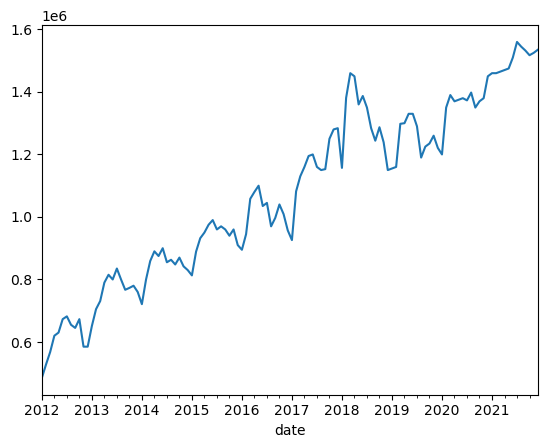

In [120]:
# plot the housing series
housing.plot()

## Are housing prices correlated to stock prices?

<p>To anwer this question, we first need to align the two Series. The Series <i>housing</i> has one entry for each ending day of each month and a value that is the 3-month moving average; the series <i>stock</i> has one entry for each <b>trading day</b> and the value that is the closing price. </p>
<p>To align the two Series, we will create a new Series of stock prices that has only one entry for every month-end-day and reports the 3-month moving median price of the stock</p>

<p>We will do the following:
<ol>
<li>Pad <i>stock</i> so that there are no missing days (currently, holidays are missing)
<li>Compute the 3-month moving median of <i>stock</i>
<li>Retain only the end-of-month days in <i>stock</i>
</ol>
</p>


#### Step #1: Pad stock so that there are no missing days (currently, holidays are missing)

In [126]:
# Pad stock so that there are no missing days (currently, holidays are missing)
# Pandas dataframe.asfreq() function is used to convert TimeSeries to specified frequency.
# '1D': 1 day
# 'ffill': propagate last valid observation forward to next valid
padded = stock.asfreq(freq='1D', method='ffill')

In [128]:
# Check top 10 stock observations
stock[:10]

Date
2004-08-19   50.22
2004-08-20   54.21
2004-08-23   54.75
2004-08-24   52.49
2004-08-25   53.05
2004-08-26   54.01
2004-08-27   53.13
2004-08-30   51.06
2004-08-31   51.24
2004-09-01   50.18
Name: Close, dtype: float64

In [130]:
# Check top 20 padded observations
padded[:20]

Date
2004-08-19   50.22
2004-08-20   54.21
2004-08-21   54.21
2004-08-22   54.21
2004-08-23   54.75
2004-08-24   52.49
2004-08-25   53.05
2004-08-26   54.01
2004-08-27   53.13
2004-08-28   53.13
2004-08-29   53.13
2004-08-30   51.06
2004-08-31   51.24
2004-09-01   50.18
2004-09-02   50.81
2004-09-03   50.06
2004-09-04   50.06
2004-09-05   50.06
2004-09-06   50.06
2004-09-07   50.84
Freq: D, Name: Close, dtype: float64

#### Step #2: Compute the 90-day moving median of stock

In [133]:
# Use rolling function to get 90-day moving median (for a given day, get the median stock price in these 90 days)
movmed = padded.rolling(90).median()

In [135]:
# Check poistion 80th to 99th observations
movmed[80:100]

Date
2004-11-07     NaN
2004-11-08     NaN
2004-11-09     NaN
2004-11-10     NaN
2004-11-11     NaN
2004-11-12     NaN
2004-11-13     NaN
2004-11-14     NaN
2004-11-15     NaN
2004-11-16   66.36
2004-11-17   66.98
2004-11-18   67.65
2004-11-19   68.15
2004-11-20   68.69
2004-11-21   68.85
2004-11-22   68.93
2004-11-23   68.93
2004-11-24   69.09
2004-11-25   69.37
2004-11-26   69.90
Freq: D, Name: Close, dtype: float64

#### Step #3: Retain the same days as in the housing Series

In [142]:
# Check top 10 dates (index)
housing.index[:10]

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31'],
              dtype='datetime64[ns]', name='date', freq=None)

In [144]:
# Get the 90 days median stock price for each observation in housing series
mod_stock = movmed[housing.index]

In [146]:
# Check 10 housing date observations' 90 days median stock price
mod_stock[:10]

date
2012-01-31   310.49
2012-02-29   310.49
2012-03-31   306.86
2012-04-30   307.37
2012-05-31   306.92
2012-06-30   300.23
2012-07-31   293.29
2012-08-31   295.52
2012-09-30   335.02
2012-10-31   342.89
Name: Close, dtype: float64

### Compute correlation

Are stock and housing prices correlated?

In [150]:
# Use corr function to check the correlation value between housing and mod_stock
housing.corr(mod_stock)

0.8738868931677115

Uh... yes, they are strongly correlated

Let's plot them

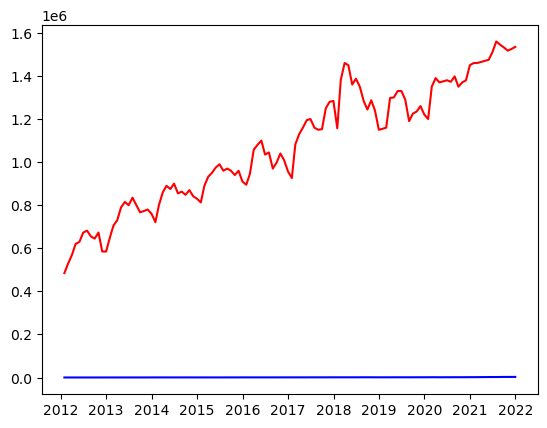

In [154]:
# plot the two series in a line chart
import matplotlib.pyplot as plt

plt.plot(mod_stock,'b')  # b for "blue"
plt.plot(housing,'r') # r for "red" 
plt.show()

mmm... the problem is that the two scales are very different: housing is about 1M dollars while the stock price is in the order of hundreds of dollars. 

Let's normalize them so that the value on the first day (2012-01-31) is 1 for both series.

In [158]:
# normalize on the first day (2012-01-31) observation
norm_stock = mod_stock / mod_stock[0]

/var/folders/_t/99rhfqy12md_q88dy260m5d80000gn/T/ipykernel_8887/2583485333.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  norm_stock = mod_stock / mod_stock[0]


In [160]:
# normalize on the first day (2012-01-31) observation
norm_housing = housing / housing.iloc[0]

Plot the normalized data again

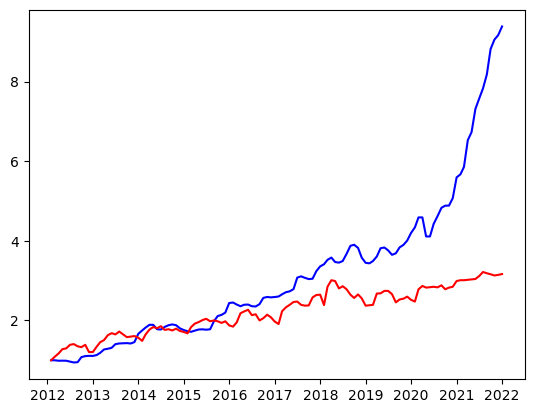

In [163]:
plt.plot(norm_stock,'b')  # b for "blue"
plt.plot(norm_housing,'r') # r for "red" 
plt.show()

Assign proper legends for different lines

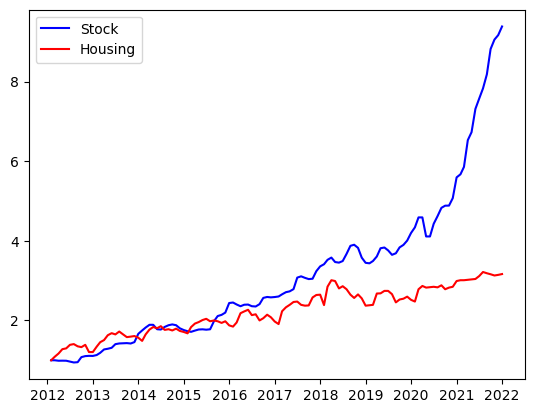

In [174]:
plt.plot(norm_stock,'b')  # b for "blue"
plt.plot(norm_housing,'r') # r for "red" 
#creates a legend for labeled plot elements
plt.legend(['Stock','Housing'])
plt.show()